In [1]:
# !pip install -U pandas-profiling
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import profile_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Internship/Homoye/Project/crimes_against_women_2001-2014.csv')
data.head()

Unnamed: 0  ... Importation of Girls
0           0  ...                    0
1           1  ...                    0
2           2  ...                    0
3           3  ...                    0
4           4  ...                    0

[5 rows x 11 columns]

## Exploratory Data Analysis (EDA):
In this part of work, we are going to perform **linearity**, **collinearity**, **check outliers**, **correlation** and **box plots**.

In [4]:
data.shape

(10677, 11)

In [5]:
data.keys()

Index(['Unnamed: 0', 'STATE/UT', 'DISTRICT', 'Year', 'Rape',
       'Kidnapping and Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [6]:
# check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Unnamed: 0                                           10677 non-null  int64 
 1   STATE/UT                                             10677 non-null  object
 2   DISTRICT                                             10677 non-null  object
 3   Year                                                 10677 non-null  int64 
 4   Rape                                                 10677 non-null  int64 
 5   Kidnapping and Abduction                             10677 non-null  int64 
 6   Dowry Deaths                                         10677 non-null  int64 
 7   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 8   Insult to modesty of Women                           10677 non-null  int64 


In [7]:
# statistics description
data.describe().T

count  ...      max
Unnamed: 0                                          10677.0  ...   9016.0
Year                                                10677.0  ...   2014.0
Rape                                                10677.0  ...   5076.0
Kidnapping and Abduction                            10677.0  ...  10626.0
Dowry Deaths                                        10677.0  ...   2469.0
Assault on women with intent to outrage her mod...  10677.0  ...  10001.0
Insult to modesty of Women                          10677.0  ...   4970.0
Cruelty by Husband or his Relatives                 10677.0  ...  23278.0
Importation of Girls                                10677.0  ...     83.0

[9 rows x 8 columns]

By observing the min, max , mean and std, the data suffer from the outliers.

The data points are highly dispersed around the mean.

#### removing duplicate value from STATE/UT

10677


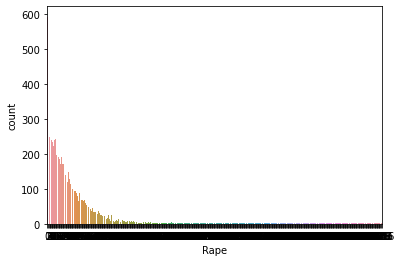

In [26]:
print(data['Rape'].count())

sns.countplot(data['Rape']);

In [9]:
data['Importation of Girls'].count()

10677

In [10]:
data['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

In [14]:
# check if there is duplicated values
print(data['STATE/UT'].duplicated().any())
print(data.duplicated().any())

True
False


The variable STATE/UT contains duplicate values. So, we are going to remove those duplicated values.

In [15]:
count_= len(data['STATE/UT'].unique())
print(f'The nmber of States with duplicates values is: {count_}')

The nmber of States with duplicates values is: 72


In [16]:
# Remove duplicate 
data['STATE/UT'] = data.apply(lambda row:row['STATE/UT'].replace(" ", "").upper(), axis=1)
data['STATE/UT'].replace('delhiut','delhi', inplace=True)

In [17]:
# count the nber of state
states= data['STATE/UT'].unique()
count_states = len(states)
print(states)
print(f'The total number of satates after removing duplicate is: {count_states}')

['ANDHRAPRADESH' 'ARUNACHALPRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHALPRADESH' 'JAMMU&KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYAPRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMILNADU'
 'TRIPURA' 'UTTARPRADESH' 'UTTARAKHAND' 'WESTBENGAL' 'A&NISLANDS'
 'CHANDIGARH' 'D&NHAVELI' 'DAMAN&DIU' 'DELHI' 'LAKSHADWEEP' 'PUDUCHERRY'
 'DELHIUT' 'TELANGANA']
The total number of satates after removing duplicate is: 37


We have t0taly 37 states.

In [20]:
# checking missing values
print(data.isnull().sum())
print('\n The total number of missed values is: ',data.isnull().sum().sum() )

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

 The total number of missed values is:  0


In [21]:
#  Remove unknown variable
data = data.drop(['Unnamed: 0'], axis=1)

In [65]:
# delete categorical variables:
df = data.drop(['STATE/UT', 'DISTRICT', 'Year'], axis=1)


### Boxplot

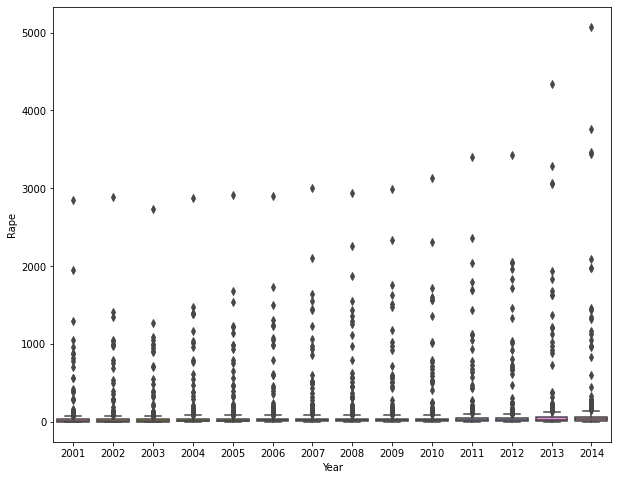

In [66]:
#  Box plot 
plt.figure(figsize=(10,8))
sns.boxplot(x='Year', y='Rape', data=data)
plt.show()

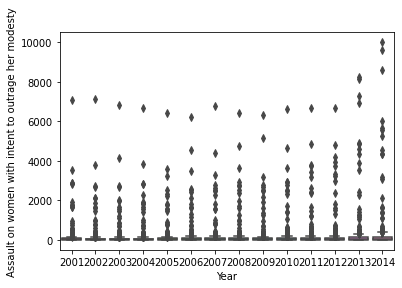

In [67]:
sns.boxplot(x=data['Year'], y=data['Assault on women with intent to outrage her modesty'])

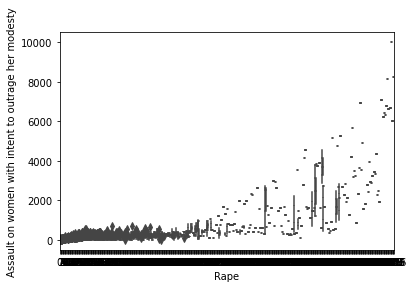

In [ ]:
sns.boxplot(x=data['Rape'], y=data['Assault on women with intent to outrage her modesty'])
plt.show()

According to the descriptive statistics(mean, std, min, max) and boxplots, our data contains outliers.

## Treatment of outlier:  Count and remove outliers

In [24]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum
def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()    

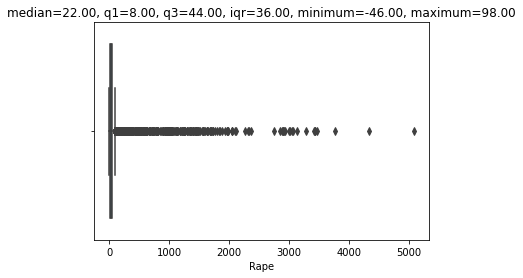

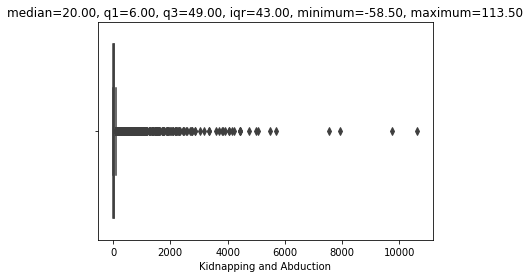

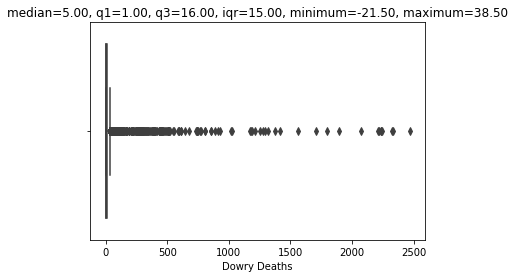

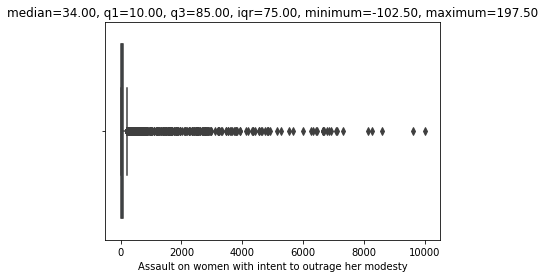

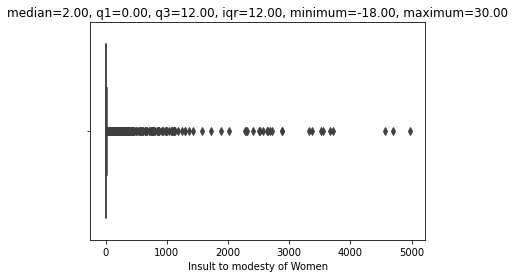

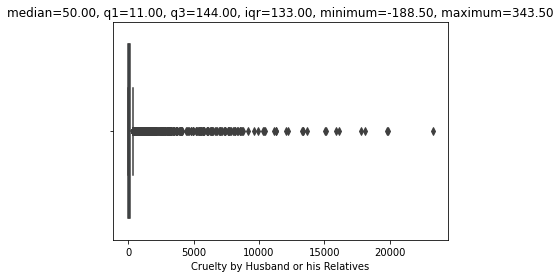

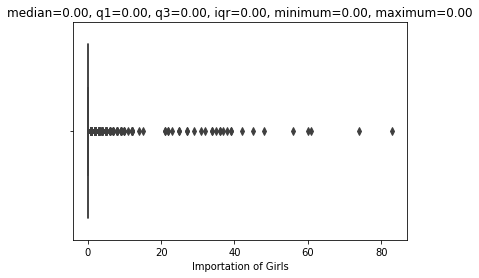

[Rape] has --> 718 outliers
[Kidnapping and Abduction] has --> 958 outliers
[Dowry Deaths] has --> 801 outliers
[Assault on women with intent to outrage her modesty] --> has 874 outliers
[Cruelty by Husband or his Relatives] has --> 948 outliers


In [38]:
# %% Plot the graphs
box_and_whisker(df, 'Rape')
box_and_whisker(df, 'Kidnapping and Abduction')
box_and_whisker(df, 'Dowry Deaths')
box_and_whisker(df, 'Assault on women with intent to outrage her modesty')
box_and_whisker(df, 'Insult to modesty of Women')
box_and_whisker(df, 'Cruelty by Husband or his Relatives')
box_and_whisker(df, 'Importation of Girls')


_, _, _, _, minimum_Col0_before, maximum_Col0_before = get_iqr_values(df, 'Assault on women with intent to outrage her modesty')

# %% Count the outliers in the original data frame
print(f"[Rape] has --> {count_outliers(df, 'Rape')} outliers")
print(f"[Kidnapping and Abduction] has --> {count_outliers(df, 'Kidnapping and Abduction')} outliers")
print(f"[Dowry Deaths] has --> {count_outliers(df, 'Dowry Deaths')} outliers")
print(f"[Assault on women with intent to outrage her modesty] --> has {count_outliers(df, 'Assault on women with intent to outrage her modesty')} outliers")
print(f"[Cruelty by Husband or his Relatives] has --> {count_outliers(df, 'Cruelty by Husband or his Relatives')} outliers")


In [70]:
# %% New helper function ...
def remove_all_outliers(df_in, col_name):
    loop_count = 0
    outlier_count = count_outliers(df_in, col_name)

    while outlier_count > 0:
        loop_count += 1

        if (loop_count > 100):
            break

        df_in = remove_outliers(df_in, col_name)
        outlier_count = count_outliers(df_in, col_name)
    
    return df_in

In [61]:
df.shape[1], df.shape

(7, (10677, 7))

In [68]:
df1 = df.drop(['Importation of Girls', 'Insult to modesty of Women'], axis=1)
df1.head()

Rape  ...  Cruelty by Husband or his Relatives
0    50  ...                                  175
1    23  ...                                  154
2    27  ...                                  186
3    20  ...                                   57
4    23  ...                                  247

[5 rows x 5 columns]

### Boxplot without Outliers

Rape has 0 outliers


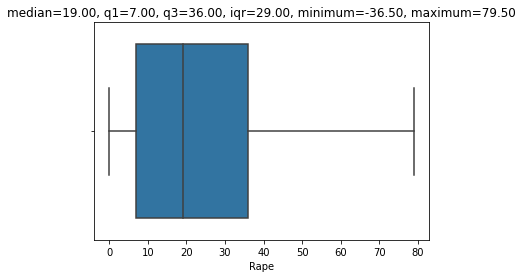

Kidnapping and Abduction has 0 outliers


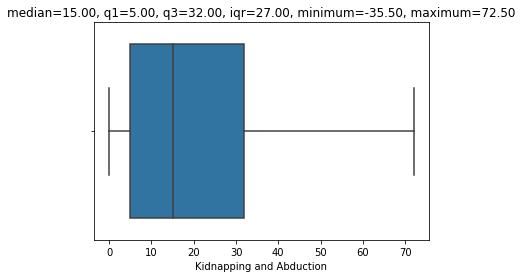

Dowry Deaths has 0 outliers


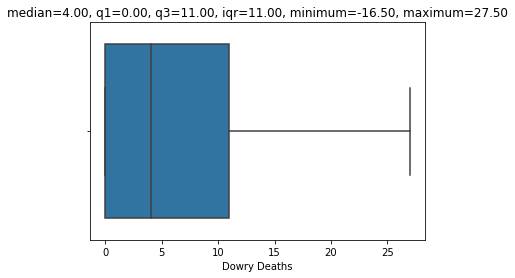

Assault on women with intent to outrage her modesty has 0 outliers


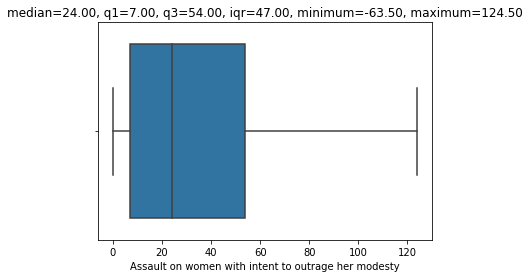

Cruelty by Husband or his Relatives has 0 outliers


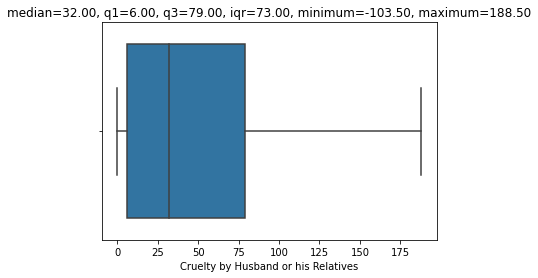

In [71]:
# s = df.shape[1]-1
for column in df1:
    dt = remove_all_outliers(df1, column)
    print(f"{column} has {count_outliers(dt, column)} outliers")
    box_and_whisker(dt, column)

### Histogram

<Figure size 1080x648 with 0 Axes>

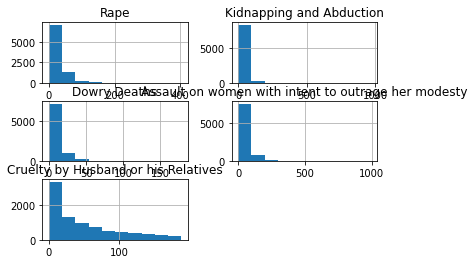

In [76]:
plt.figure(figsize=(15,9))
dt.hist(bins=10)
plt.show()

In [77]:
dt.describe().T

count  ...    max
Rape                                                8628.0  ...  403.0
Kidnapping and Abduction                            8628.0  ...  964.0
Dowry Deaths                                        8628.0  ...  178.0
Assault on women with intent to outrage her mod...  8628.0  ...  990.0
Cruelty by Husband or his Relatives                 8628.0  ...  188.0

[5 rows x 8 columns]

### Summary of the data

In [ ]:
#  Let check the summary of the data

data_report = data.profile_report()
data_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **Correlation** 

In [80]:
#  correlation with outlier
corr = data.corr()
corr

Year  ...  Importation of Girls
Year                                                1.000000  ...             -0.028462
Rape                                                0.052522  ...              0.223290
Kidnapping and Abduction                            0.095102  ...              0.130405
Dowry Deaths                                        0.007497  ...              0.283636
Assault on women with intent to outrage her mod...  0.050482  ...              0.115706
Insult to modesty of Women                         -0.009024  ...              0.031304
Cruelty by Husband or his Relatives                 0.059667  ...              0.132135
Importation of Girls                               -0.028462  ...              1.000000

[8 rows x 8 columns]

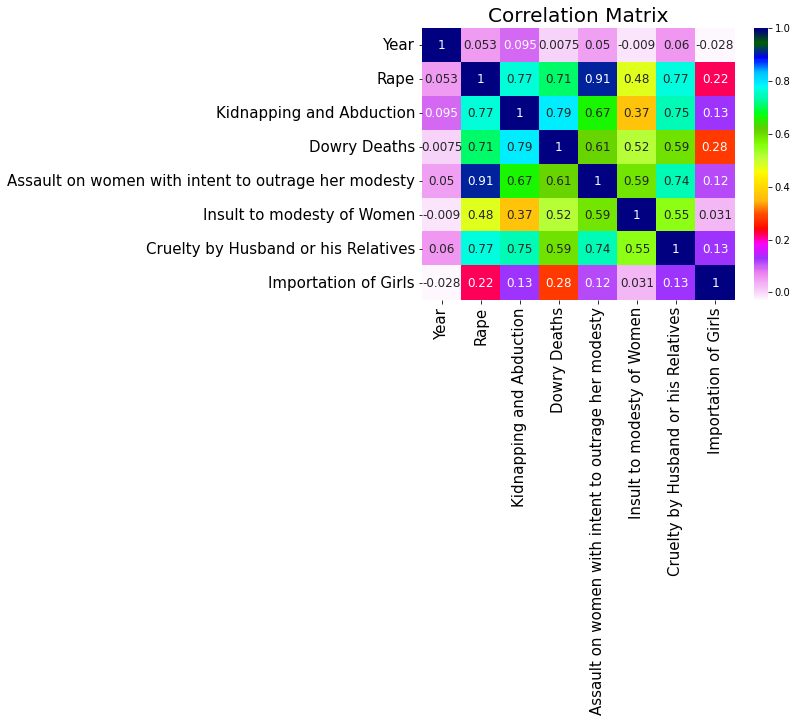

In [ ]:

sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, 
           annot = True, annot_kws={'size':12}, cmap='gist_ncar_r')
heat_map = plt.gcf()
heat_map.set_size_inches(7,5)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

From this figure , we can notice that there is a strong relationship between **rape** and **Assault on women with intent to outrage her modesty**.
There is also positive relationship between (Rape and  Cruelty by Husband or his Relatives), (Rape and Kidnapping and Abduction), (Rape and Dowry Deaths),(Rape and  Dowry Deaths and Kidnapping and Abduction).

All the others variables are well correlated.

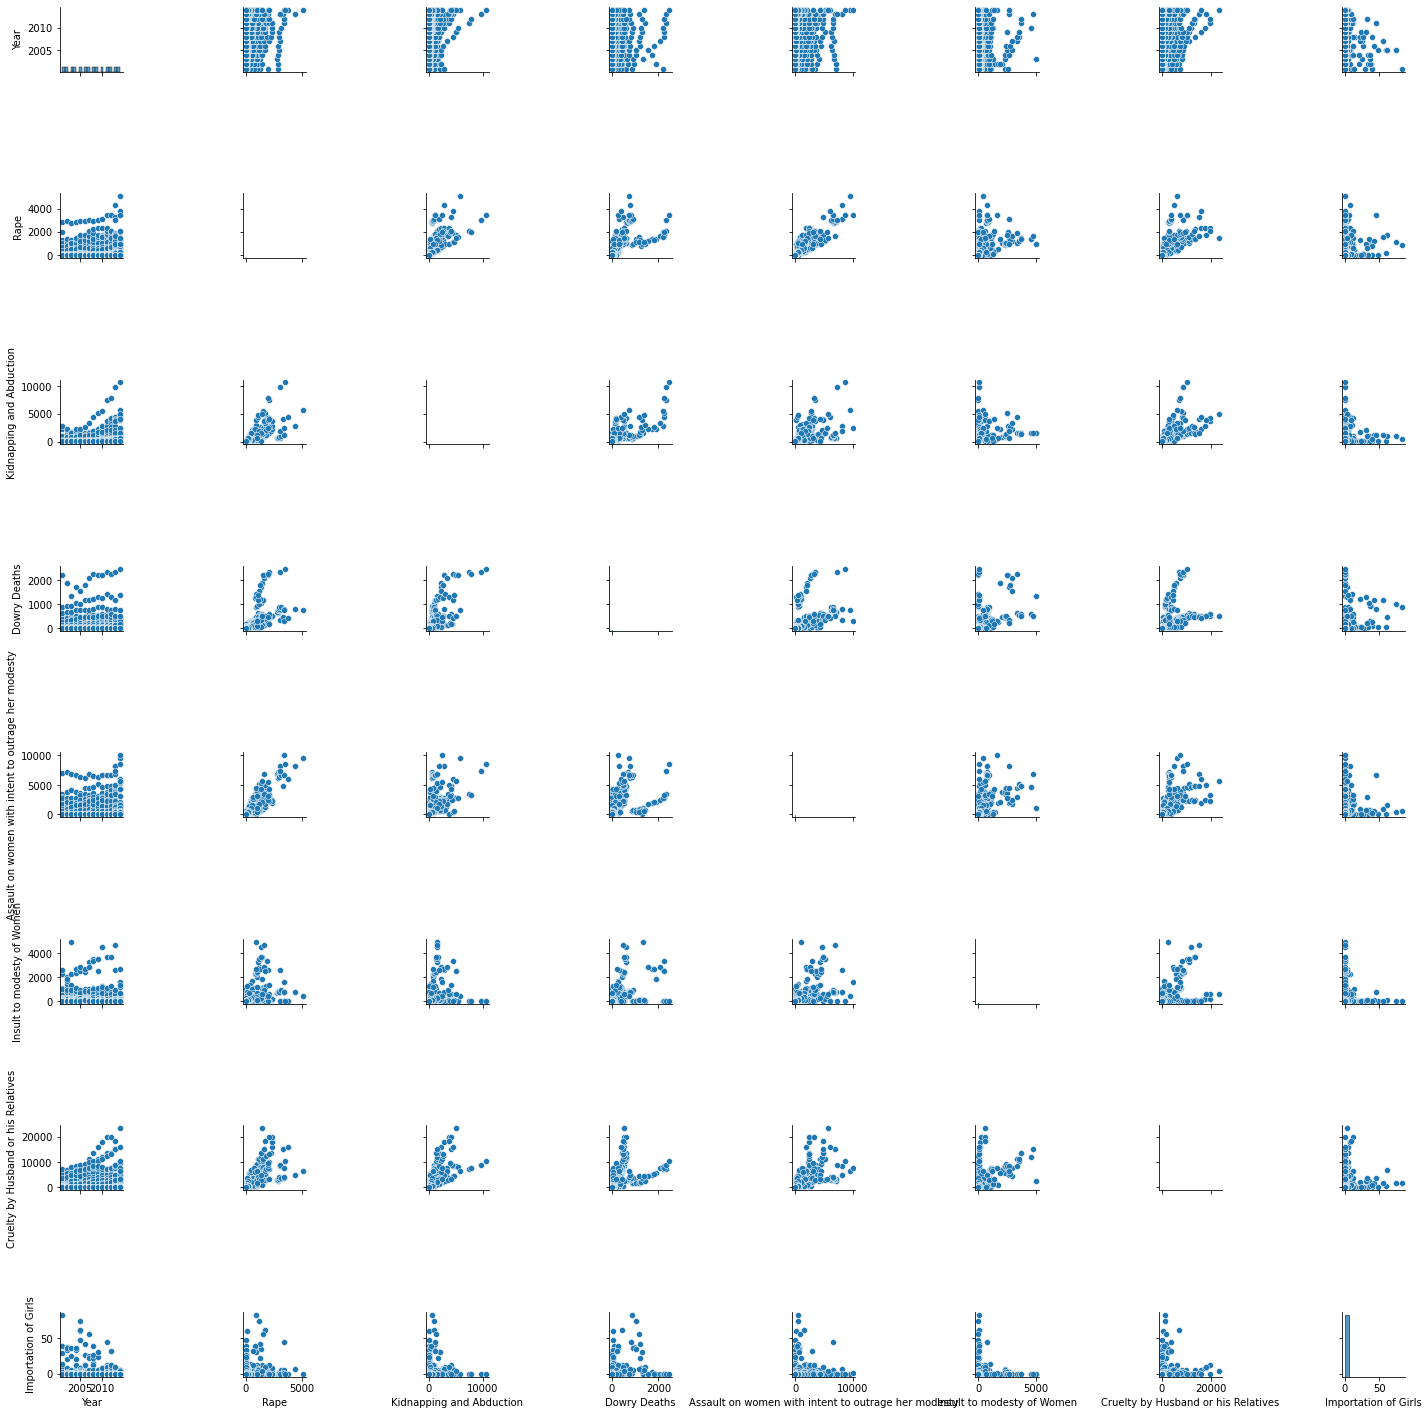

In [ ]:
# correlation between variables
sns.pairplot(data)
plt.show()

####**Correlation after removing outliers**


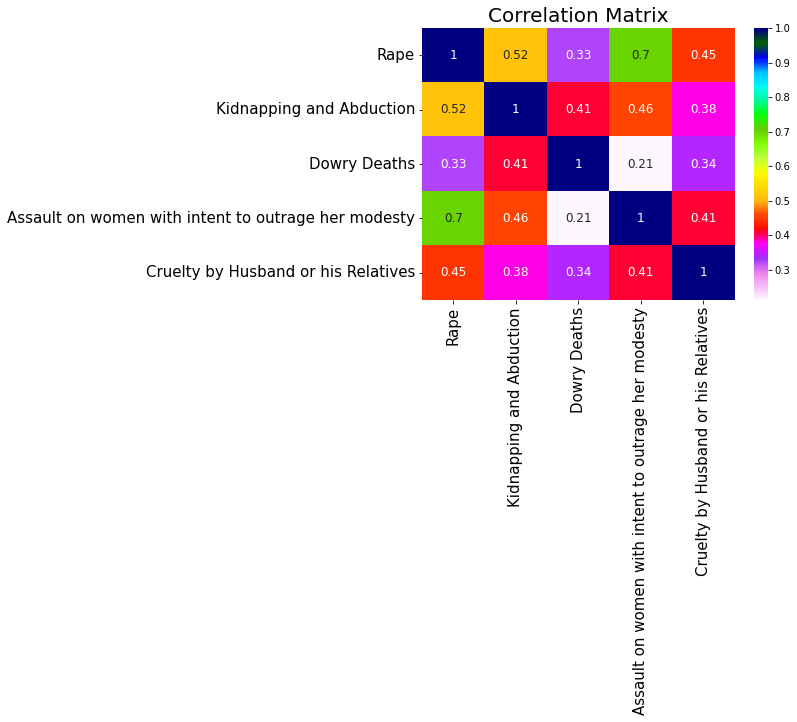

In [78]:
corr2 = dt.corr()
sns.heatmap(corr2, xticklabels = corr2.columns.values, yticklabels = corr2.columns.values, 
           annot = True, annot_kws={'size':12}, cmap='gist_ncar_r')
heat_map = plt.gcf()
heat_map.set_size_inches(7,5)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

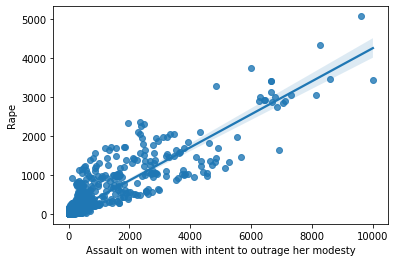

In [ ]:
sns.regplot(x='Assault on women with intent to outrage her modesty', y='Rape', data=data)

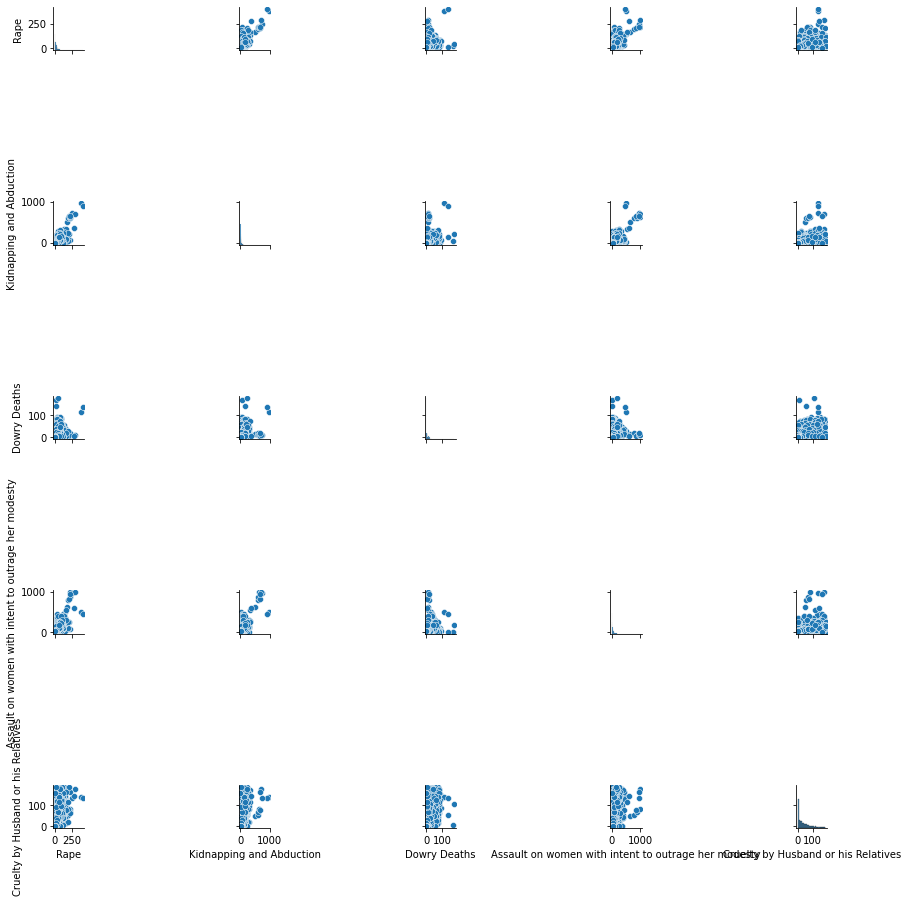

In [82]:
# correlation between variables without outliers
sns.pairplot(dt)
plt.show()

### Count plot

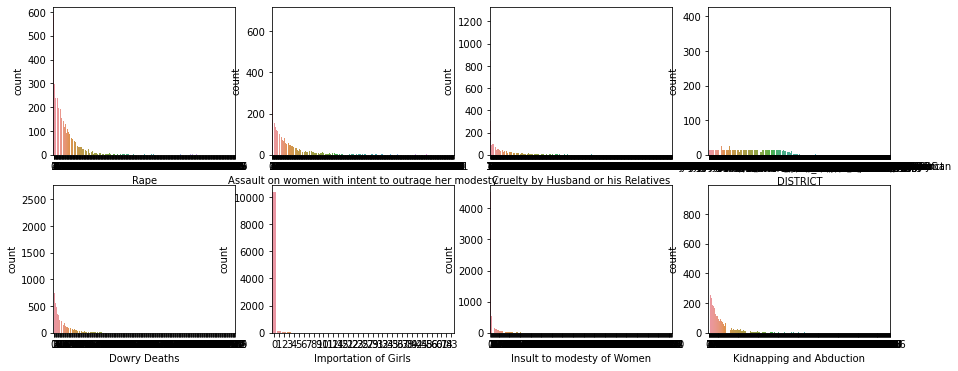

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(241)
sns.countplot(data['Rape'])

plt.subplot(242)
sns.countplot(data['Assault on women with intent to outrage her modesty'])

plt.subplot(243)
sns.countplot(data['Cruelty by Husband or his Relatives'])

plt.subplot(244)
sns.countplot(data['DISTRICT'])

plt.subplot(245)
sns.countplot(data['Dowry Deaths'])

plt.subplot(246)
sns.countplot(data['Importation of Girls'])

plt.subplot(247)
sns.countplot(data['Insult to modesty of Women'])

plt.subplot(248)
sns.countplot(data['Kidnapping and Abduction'])

plt.show()

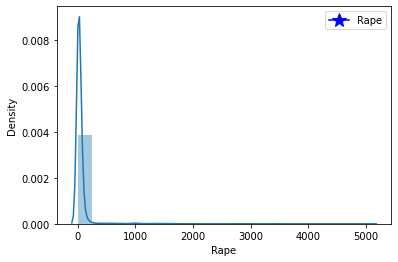

In [ ]:
# histogram and Probability Density Function(PDF) of spei
import matplotlib.lines as mlines


sns.distplot(data.Rape, bins=20)
blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Rape')
plt.legend(handles=[blue_line])
# plt.legend()
plt.show()

In [ ]:
import plotly.express as px


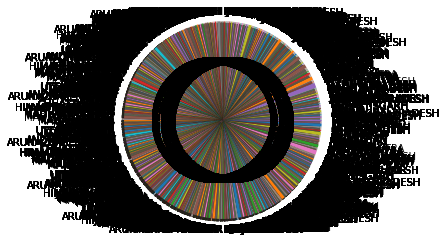

In [83]:
# Program 3: 
labels = data['STATE/UT']
# explode = (0,0,0.5,0,0.8,0,0,0)
# colors = ['yellowgreen','gold','lightskyblue','lightcoral']
plt.pie(data['Rape'] #, explode=explode  # fraction of the radius with which to offset each wedge
        , labels=labels,
        # colors=colors,
        autopct='%.1f%%', # string or function used to label the wedges with their numeric value
        shadow=True,
        startangle=45, # rotate the start of the pie chart by angle degrees counterclockwise from the x-axis
        )
plt.axis('equal')  # turns off the axis lines and labels
# plt.title('Web browser maketshare - 2021')
plt.show()